In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_moons
import numpy as np
# Generate moon dataset
points_to_generate = 1000
X, _ = make_moons(n_samples=1000, noise=0.1)
#X = np.random.rand(6, 2)
# make a fake X and y to use imbalearn to just generate fake X like data
random_X = np.random.rand(len(X) + points_to_generate, 2)
y = np.zeros(2 * len(X) + points_to_generate)
y[-(len(X) + points_to_generate):] = 1
X_all = np.vstack([X, random_X])

print(np.unique(y, return_counts=True))

# Apply SMOTE to generate synthetic data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_all, y)

X_false = X_res[-points_to_generate:]
#X_false = X_res[len(X):len(X) + points_to_generate]



(array([0., 1.]), array([1000, 2000]))


In [3]:
import numpy as np
np.unique(y_res, return_counts=True)

(array([0., 1.]), array([2000, 2000]))

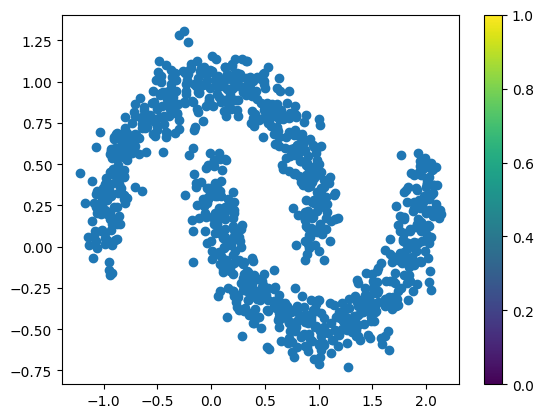

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], alpha=1)
plt.colorbar()
plt.show()

In [2]:
from synthcity_addons import generators
import matplotlib.pyplot as plt
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

loader = GenericDataLoader(X)

syn_model = Plugins().get("dummy_sampler")
syn_model.fit(loader)

false_data = syn_model.generate(512)
# plt.scatter(false_data[:, 0], false_data[:, 1], alpha=0.1)
# plt.title(method)
# plt.show()

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2024-07-01T16:36:34.380883+0200][108348][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
INFO:datasets:PyTorch version 1.13.1 available.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpcbkir6m4
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpcbkir6m4/_remote_module_non_scriptable.py
[2024-07-01T16:36:37.182775+0200][108348][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


In [3]:
from synthcity.metrics.eval_sanity import NearestRealNeighborDistanceNoNorm, NearestSyntheticNeighborDistanceNoNorm

NearestRealNeighborDistanceNoNorm().evaluate(loader, false_data)

1000
512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{'mean': 0.0}

In [8]:
from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import GenericDataLoader

loader = GenericDataLoader(X)

score = Benchmarks().evaluate([("gaussian_noise", "gaussian_noise", {})], loader, loader, synthetic_size=512,
                      metrics={"sanity": ["nearest_real_neighbor_distance_no_norm", "nearest_synthetic_neighbor_distance_no_norm"]})

[2024-07-01T16:37:42.924140+0200][108348][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2024-07-01T16:37:43.012882+0200][108348][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2024-07-01T16:37:43.094442+0200][108348][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


fit
generating
synthetic_size 512
sample
sample
X_syn 512
sample
sample
1000
512
[0.01954625 0.02693234 0.02061865 0.06733437 0.05237246 0.02379367
 0.02879155 0.0137646  0.09472776 0.03962107 0.02757963 0.00619608
 0.03429217 0.02762908 0.00262966 0.04016022 0.01140358 0.08856141
 0.04880354 0.01416795 0.01367223 0.04645421 0.04053572 0.02230442
 0.01482249 0.04167236 0.07405321 0.02771615 0.02871424 0.03021798
 0.0516049  0.01909648 0.03371866 0.03260188 0.01707256 0.04729394
 0.01566631 0.0351511  0.00424959 0.01554981 0.02204722 0.01469474
 0.03822957 0.041912   0.04776675 0.08933786 0.0330376  0.02114172
 0.02950748 0.00575062 0.02622213 0.00646173 0.02146951 0.00580016
 0.02456925 0.02292494 0.01510649 0.01771127 0.03480734 0.02222751
 0.01744529 0.0319697  0.02181308 0.0150039  0.03868198 0.04398193
 0.04712596 0.02807855 0.03758624 0.01510112 0.17006808 0.02068752
 0.03213432 0.02815431 0.02386964 0.04158098 0.03319912 0.00994718
 0.0196323  0.02199561 0.03660348 0.02191728 0.0

In [7]:
score["dummy_sampler4"]

,min,max,mean,stddev,median,iqr,rounds,errors,durations,direction
sanity.nearest_real_neighbor_distance_no_norm.mean,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0,minimize


In [7]:
score

{'dummy_sampler4': Empty DataFrame
 Columns: [min, max, mean, stddev, median, iqr, rounds, errors, durations, direction]
 Index: []}

In [ ]:
# check is some of the points are the same
np.any(X_false == X)

In [ ]:
plt.scatter(X_false[:, 0], X_false[:, 1], alpha=1)
plt.colorbar()
plt.show()

In [ ]:
print(2)

In [10]:
from sklearn.datasets import load_diabetes, make_moons
from synthcity.plugins import Plugins
import pandas as pd
from synthcity.plugins.core.dataloader import GenericDataLoader


#X, y = load_diabetes(return_X_y=True, as_frame=True)
#X["target"] = y
X = make_moons(n_samples=8_000, noise=0.1)[0]

# make into a pandas dataframe
X = pd.DataFrame(X, columns=["x1", "x2"])

loader = GenericDataLoader(X)


# methods = ["adsgan", "pategan", "ctgan", "tvae", "rvae", "nflow", "ddpm"]
# for method in methods:
#     syn_model = Plugins().get(method)
#     syn_model.fit(X)

# false_data = syn_model.sample(1000)
# plt.scatter(false_data["x1"], false_data["x2"], alpha=0.1)
# plt.title(method)
# plt.show()

In [ ]:
from ForestDiffusion import ForestDiffusionModel

# Classification problem (outcome is categorical)
forest_model = ForestDiffusionModel(X.to_numpy(), label_y=None, n_batch=1, n_t=15, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
X_fake = forest_model.generate(batch_size=X.shape[0]) # last variable will be the label_y

[2024-06-26T17:08:52.532727+0200][275787][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


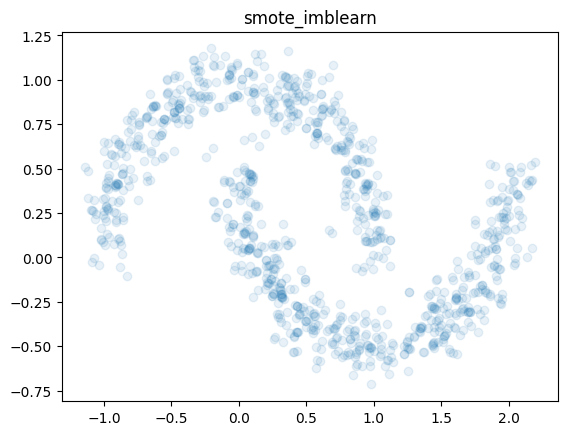

In [11]:
from synthcity_addons import generators
import matplotlib.pyplot as plt
from synthcity.plugins import Plugins
methods = ["smote_imblearn"]
for method in methods:
    syn_model = Plugins().get(method)
    syn_model.fit(loader)

false_data = syn_model.sample(1000)
plt.scatter(false_data[:, 0], false_data[:, 1], alpha=0.1)
plt.title(method)
plt.show()

[2024-06-26T17:09:01.975379+0200][275787][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


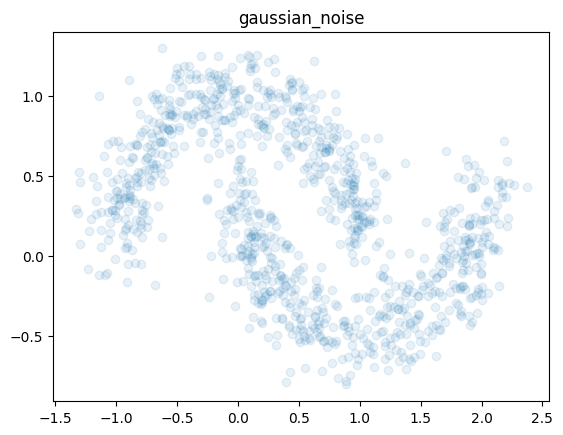

In [12]:
from synthcity_addons import generators
import matplotlib.pyplot as plt
from synthcity.plugins import Plugins
methods = ["gaussian_noise"]
for method in methods:
    syn_model = Plugins().get(method)
    syn_model.fit(loader)

false_data = syn_model.sample(1000)
plt.scatter(false_data[:, 0], false_data[:, 1], alpha=0.1)
plt.title(method)
plt.show()

In [ ]:
false_data.shape

In [ ]:
false_data

[2024-06-26T15:58:15.169798+0200][275787][CRITICAL] module disabled: /scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


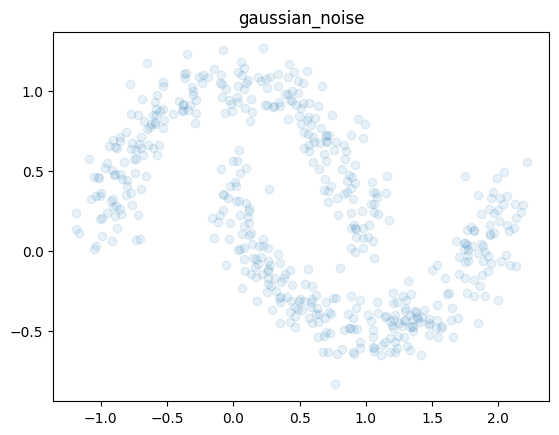

In [5]:
from synthcity_addons import generators
import matplotlib.pyplot as plt
methods = ["gaussian_noise"]
for method in methods:
    syn_model = Plugins().get(method)
    syn_model.noise_std = 0.05
    syn_model.fit(loader)

false_data = syn_model.sample(512)
plt.scatter(false_data[:, 0], false_data[:, 1], alpha=0.1)
plt.title(method)
plt.show()

In [ ]:
plt.scatter(X_fake[:, 0], X_fake[:, 1], alpha=0.1)
plt.title("ForestDiffusion")

In [ ]:
X_numpy = X.to_numpy()
plt.scatter(X_numpy[:, 0], X_numpy[:, 1], alpha=0.1)

In [ ]:
from sklearn.datasets import load_diabetes, make_moons
from synthcity.plugins import Plugins
import pandas as pd

#X, y = load_diabetes(return_X_y=True, as_frame=True)
#X["target"] = y
X = make_moons(n_samples=10_000, noise=0.1)[0]

# make into a pandas dataframe
X = pd.DataFrame(X, columns=["x1", "x2"])


methods = ["adsgan", "pategan", "ctgan", "tvae", "rvae", "nflow", "ddpm"]
for method in methods:
    syn_model = Plugins().get(method)
    syn_model.fit(X)

false_data = syn_model.sample(1000)
plt.scatter(false_data["x1"], false_data["x2"], alpha=0.1)
plt.title(method)
plt.show()

In [ ]:
false_data = syn_model.generate(1000)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(false_data["x1"], false_data["x2"], c="red")

In [ ]:
plt.scatter(X["x1"], X["x2"], c="blue")